In [67]:
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random

query = """select * from assets ORDER BY date ASC;"""
connection = psycopg2.connect(host=config.DB_HOST, database=config.DB_NAME, user= config.DB_USER, password=config.DB_PASS)
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
engine = create_engine(f'postgresql://{config.DB_USER}:{config.DB_PASS}@{config.DB_HOST}:{config.DB_PORT}/{config.DB_NAME}')

df = pd.read_sql_query(query,con=engine)
SYMBOLS = ['MSFT','AAPL','NVDA','UBER',]
IS_INVESTED = False

In [30]:
df['open_high'] = df['open'] + df['high']

In [31]:
df['open_high']

0         601.129883
1         535.529999
2         331.568893
3        5474.000000
4         362.727905
            ...     
13098     304.179993
13099     167.094994
13100    4522.679932
13101      45.939999
13102     529.390015
Name: open_high, Length: 13103, dtype: float64

In [53]:
df.head()

name                date         open         high          low  \
0  MSFT 2022-03-22 13:30:00   299.799988   301.329895   298.769989   
1  NVDA 2022-03-22 13:30:00   267.269989   268.260010   266.260101   
2  AAPL 2022-03-22 13:30:00   165.509995   166.058899   164.910004   
3  GOOG 2022-03-22 13:30:00  2730.000000  2744.000000  2730.000000   
4  COIN 2022-03-22 13:30:00   180.498001   182.229904   178.500000   

         close     adjclose     volume    open_high  
0   300.612213   300.612213  1060686.0   601.129883  
1   266.950012   266.950012  1974152.0   535.529999  
2   166.020004   166.020004  3235766.0   331.568893  
3  2741.392090  2741.392090    47997.0  5474.000000  
4   181.884995   181.884995   286568.0   362.727905

In [68]:
def numbers(element):
    return "".join(filter(str.isnumeric, element))

In [70]:
df.loc[:,'prices_'] = [numbers(x) for x in df.name]


In [73]:
df['name'] = df['num']

In [77]:
ut = "utku"

In [78]:
ku = "ut"

In [79]:
ku == ut[:len(ku)]

True

ut = "utku"

In [76]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print stats.ttest_1samp(rvs,5.0)

SyntaxError: invalid syntax (2392601807.py, line 3)

In [ ]:
for i in enumerate()

In [75]:
df.drop('name',axis='columns')

date         open         high          low        close  \
0     2022-03-22 13:30:00   299.799988   301.329895   298.769989   300.612213   
1     2022-03-22 13:30:00   267.269989   268.260010   266.260101   266.950012   
2     2022-03-22 13:30:00   165.509995   166.058899   164.910004   166.020004   
3     2022-03-22 13:30:00  2730.000000  2744.000000  2730.000000  2741.392090   
4     2022-03-22 13:30:00   180.498001   182.229904   178.500000   181.884995   
...                   ...          ...          ...          ...          ...   
13098 2022-05-09 19:55:00   151.619995   152.559998   151.589996   152.149994   
13099 2022-05-09 19:55:00    83.144997    83.949997    83.089996    83.500000   
13100 2022-05-09 19:55:00  2254.449951  2268.229980  2254.449951  2261.659912   
13101 2022-05-09 19:55:00    22.889999    23.049999    22.889999    23.049999   
13102 2022-05-09 19:55:00   264.010010   265.380005   264.000000   264.589996   

          adjclose     volume num  
0       300.612213  1060686.0      
1       266.950012  1974152.0      
2       166.020004  3235766.0      
3      2741.392090    47997.0      
4       181.884995   286568.0      
...            ...        ...  ..  
13098   152.149994  4941577.0      
13099    83.500000   554468.0      
13100  2261.659912   105542.0      
13101    23.049999  2203397.0      
13102   264.589996  2281843.0      

[13103 rows x 8 columns]

In [55]:
df =df.sort_values('open_high',ascending=False)

In [59]:
df[df['name']=='GOOG'].iloc[:1]



Empty DataFrame
Columns: [name, date, open, high, low, close, adjclose, volume, open_high]
Index: []

In [60]:
df[df['name']=='MSFT'].iloc[:1]

name                date        open        high         low  \
2595  MSFT 2022-03-30 17:00:00  315.660004  315.950012  315.423004   

           close    adjclose    volume   open_high  
2595  315.745087  315.745087  228643.0  631.610016

In [64]:
def drop_na_bf_fill(df):
    """drop_na_bf_fill"""
    df.dropna(axis=0,how='all',inplace=True)
    # df.dropna(axis=1,how='any',inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df

def get_close_values_of_df(df):
    """get_close_values_of_df"""
    symbols = df['name'].unique()
    df_msft = df[df['name'] == 'MSFT']
    final_df = pd.DataFrame(data=df_msft['close'].to_numpy(), index = df_msft['date'],columns=['MSFT'])
    for symbol in symbols:
        if symbol != 'MSFT':
            df_sym = df[df['name'] == symbol]
            df_tmp = pd.DataFrame(data=df_sym['close'].to_numpy(), index = df_sym['date'],columns=[symbol])
            final_df =final_df.join(df_tmp)
    return drop_na_bf_fill(final_df)

def get_returns(df):
    """get_returns"""
    df = get_close_values_of_df(df)
    for symbol in df.columns.values:
        df[f'{symbol}_Prev_close']=df[symbol].shift(1)
        df[f'{symbol}_Return'] = df[f'{symbol}'] / df[f'{symbol}_Prev_close'] - 1
        df[f'{symbol}_Log_Return'] = np.log(df[f'{symbol}_Return'] + 1)
    return df

def assign_is_invested(buy,sell):
    """assign_is_invested"""
    global IS_INVESTED
    if IS_INVESTED and sell:
        IS_INVESTED = False
    if not IS_INVESTED and buy:
        IS_INVESTED = True
    return IS_INVESTED

def sma_close(df,slow,fast):
    """ get_close """
    global SYMBOLS
    for symbol in SYMBOLS:
        df[f'{symbol}_Slow_SMA'] = df[symbol].rolling(slow).mean()
        df[f'{symbol}_Fast_SMA'] = df[symbol].rolling(fast).mean()
        df[f'{symbol}_Signal'] = np.where(df[f'{symbol}_Fast_SMA'] >= df[f'{symbol}_Fast_SMA'],1,0)
        df[f'{symbol}_Prev_Signal'] = df[f'{symbol}_Signal'].shift(1)
        df[f'{symbol}_Buy']= (df[f'{symbol}_Prev_Signal'] == 0) & (df[f'{symbol}_Signal'] == 1) # Fast< Slow --> Fast > Slow
        df[f'{symbol}_Sell']= (df[f'{symbol}_Prev_Signal'] == 1) & (df[f'{symbol}_Signal'] == 0) # Fast> Slow --> Fast > 
        df[f'{symbol}_Is_Invested'] = df.apply(lambda row: assign_is_invested(row[f'{symbol}_Buy'], [f'{symbol}_Sell']),axis=1)
    return df
def algo_log_return(df):
    """algo_log_return"""
    global SYMBOLS
    for symbol in SYMBOLS:
        df[f'{symbol}_Algo_Log_Return'] = df[f'{symbol}_Is_Invested'] * df[f'{symbol}_Log_Return']
    return df

def shifted_log_return(df):
    """shifted_log_return"""
    global SYMBOLS
    for symbol in SYMBOLS:
        df[f'{symbol}_Shifted_Log_Return'] = df[f'{symbol}_Log_Return'].shift(-1)
    return df

In [65]:
df = get_returns(df)
df = sma_close(df,30,10)
df = algo_log_return(df)
df = shifted_log_return(df)

In [66]:
df_msft = df[['MSFT_Slow_SMA', 'MSFT_Fast_SMA']]
df_msft_label = df['MSFT_Shifted_Log_Return']

In [67]:
Ntest = 400
train_msft = df_msft.iloc[30:Ntest]
test_msft = df_msft.iloc[Ntest:-1]
train_msft_l = df_msft_label.iloc[30:Ntest]
test_msft_l = df_msft_label.iloc[Ntest:-1]
Ctrain = (train_msft_l>0)
Ctest = (test_msft_l>0)
model = RandomForestClassifier(random_state=20)
model.fit(train_msft, Ctrain)
print(f'Train_Score = {model.score(train_msft, Ctrain)}, Test_Score = {model.score(test_msft,Ctest)}')


Train_Score = 1.0, Test_Score = 0.4784071789119462


In [68]:
Ptrain =model.predict(train_msft)
Ptest =model.predict(test_msft)

In [69]:
Ctest

date
2022-03-30 14:20:00    False
2022-03-30 14:25:00    False
2022-03-30 14:30:00     True
2022-03-30 14:35:00    False
2022-03-30 14:40:00    False
                       ...  
2022-05-09 19:30:00     True
2022-05-09 19:35:00    False
2022-05-09 19:40:00    False
2022-05-09 19:45:00     True
2022-05-09 19:50:00     True
Name: MSFT_Shifted_Log_Return, Length: 1783, dtype: bool

roc_auc_score: 0.5003857732863345
[0.         0.00107411 0.00322234 0.00429646 0.00537057 0.72610097
 0.72932331 0.73147154 0.73254565 0.73576799 0.73899033 0.74113856
 0.74328679 0.7443609  0.74758324 0.75080559 0.7518797  0.75510204
 0.75510204 0.75617615 0.75832438 0.76047261 0.76262084 0.76262084
 0.76369495 0.81310419 0.81525242 0.81847476 0.81847476 0.82277121
 0.82599356 0.8292159  0.83029001 0.83458647 0.83673469 0.84317938
 0.85392052 0.85929108 0.86466165 0.867884   0.87325456 0.88077336
 0.88292159 0.88721805 0.8990333  0.90225564 0.90655209 0.90870032
 0.91621912 0.93555317 0.94092374 0.94414608 0.94844253 0.95166488
 0.96455424 0.98603652 0.98711063 0.99033298 0.99033298 0.9924812
 0.9924812  0.99355532 0.99570354 0.99677766 0.99785177 0.99785177
 0.99892589 0.99892589 1.         1.        ]
[0.         0.00352113 0.00352113 0.00352113 0.00469484 0.73122066
 0.73239437 0.73474178 0.73591549 0.73591549 0.73826291 0.73826291
 0.74178404 0.74178404 0.74295775 0.74647887 0.75 

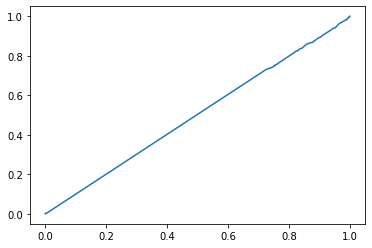

In [70]:
y_test_pp = model.predict_proba(test_msft)
print('roc_auc_score:', roc_auc_score(Ctest, y_test_pp[:,1]))
fpr, tpr, thres = roc_curve(Ctest, y_test_pp[:,1])
print(fpr)
print(tpr)
print(thres)
ax = plt.plot(fpr, tpr)
plt.show()

In [71]:
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random

query = """select * from assets ORDER BY date ASC;"""
connection = psycopg2.connect(host=config.DB_HOST, database=config.DB_NAME, user= config.DB_USER, password=config.DB_PASS)
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
engine = create_engine(f'postgresql://{config.DB_USER}:{config.DB_PASS}@{config.DB_HOST}:{config.DB_PORT}/{config.DB_NAME}')

df = pd.read_sql_query(query,con=engine)
SYMBOLS = ['MSFT','AAPL','NVDA','UBER','COIN']
IS_INVESTED = False

In [72]:
def get_rsi(df, rsi_period):
    chg = df['close'].diff(1)
    gain = chg.mask(chg<0,0)
    loss = chg.mask(chg>0,0)
    avg_gain = gain.ewm(com=rsi_period-1, min_periods=rsi_period).mean()
    avg_loss = loss.ewm(com=rsi_period-1, min_periods=rsi_period).mean()
    rs = abs(avg_gain/avg_loss)
    rsi = 100 - (100/(1+rs))
    return rsi

def add_vwap(df):
    '''Returns dataframe with additional columns:
        vwap (float): Volume Weighted Average Price
        vwap_var (float): % variance of close from vwap
    Args:
        df (pandas.DataFrame): Dataframe with at least columns:
            datetime
            open
            high
            low
            adj_close
            volume
    Returns:
        df (pandas.DataFrame)
    '''
    df['vwap'] = (df['volume']*(df['high']+df['low']+df['adjclose'])/3).cumsum()/df['volume'].cumsum()
    df['vwap'] = df['vwap'].fillna(df['adjclose'])
    df['vwap_var'] = (df['adjclose']/df['vwap'])-1
    return df

In [73]:
def add_indicators(df):
    # relative strength index
    df['rsi14'] = get_rsi(df, 14)
    # moving averages
    df['sma9'] = df['close'].rolling(9).mean()
    df['sma180'] = df['close'].rolling(180).mean()
    df['sma9_var'] = (df['close']/df['sma9'])-1
    df['sma180_var'] = (df['close']/df['sma180'])-1
    # spreads
    df['spread']=((df['close']/df['open'])-1).abs()
    df['spread14_e']=df['spread'].ewm(span=14).mean()
    # volume-based indicator
    df['volume14'] = df['volume'].rolling(14).mean()
    df['volume34'] = df['volume'].rolling(34).mean()
    df['volume14_34_var'] = (df['volume14']/df['volume34'])-1
    df = add_vwap(df)
    return df

In [74]:
df = add_indicators(df)

In [75]:
def drop_na_bf_fill(df):
    """drop_na_bf_fill"""
    df.dropna(axis=0,how='all',inplace=True)
    # df.dropna(axis=1,how='any',inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df

In [76]:
def upside_down(df):
    symbols = df['name'].unique()
    df_msft = df[df['name'] == 'MSFT']
    symbol = 'MSFT'
    final_df = pd.DataFrame(data=df_msft[['close','rsi14','sma9','sma180','sma9_var','sma180_var','spread','spread14_e','volume14','volume34','volume14_34_var','vwap','vwap_var']].to_numpy(), index = df_msft['date'],columns=[[f'{symbol}_Close',f'{symbol}_Rsi14',f'{symbol}_Sma9',f'{symbol}_Sma180',f'{symbol}_Sma9_var',f'{symbol}_Sma180_var',f'{symbol}_Spread',f'{symbol}_Spread14_e',f'{symbol}_Volume14',f'{symbol}_Volume34',f'{symbol}_Volume14_34_var',f'{symbol}_Vwap',f'{symbol}_vwap_var']])
    for symbol in symbols:
        if symbol != 'MSFT':
            df_sym = df[df['name'] == symbol]
            df_tmp = pd.DataFrame(data=df_sym[['close','rsi14','sma9','sma180','sma9_var','sma180_var','spread','spread14_e','volume14','volume34','volume14_34_var','vwap','vwap_var']].to_numpy(), index = df_sym['date'],columns=[[f'{symbol}_Close',f'{symbol}_Rsi14',f'{symbol}_Sma9',f'{symbol}_Sma180',f'{symbol}_Sma9_var',f'{symbol}_Sma180_var',f'{symbol}_Spread',f'{symbol}_Spread14_e',f'{symbol}_Volume14',f'{symbol}_Volume34',f'{symbol}_Volume14_34_var',f'{symbol}_Vwap',f'{symbol}_vwap_var']])
            final_df =final_df.join(df_tmp)
    return drop_na_bf_fill(final_df)

In [77]:
df = upside_down(df)


In [78]:
def return_prev(df):
    for symbol in SYMBOLS:
        df[f'{symbol}_Prev_close']=df[f'{symbol}_Close'].shift(1)
        df[f'{symbol}_Return'] = np.array(df[f'{symbol}_Close']) / np.array(df[f'{symbol}_Prev_close']) - 1
        df[f'{symbol}_Log_Return'] = np.log(df[f'{symbol}_Return'] + 1)
    return df

In [79]:
def shifted_log_return(df):
    for symbol in SYMBOLS:
        df[f'{symbol}_Shifted_Log_Return'] = df[f'{symbol}_Log_Return'].shift(-1)
    return df

In [80]:
df = return_prev(df)
df = shifted_log_return(df)

In [81]:
symbol='MSFT'

In [82]:
df

MSFT_Close MSFT_Rsi14   MSFT_Sma9 MSFT_Sma180  \
date                                                                 
2022-03-22 13:30:00  300.612213  48.766782  464.715001  625.734044   
2022-03-22 13:35:00  300.709991  48.766782  464.715001  625.734044   
2022-03-22 13:40:00  301.040100  48.766782  464.715001  625.734044   
2022-03-22 13:45:00  299.970001  48.760684  479.530001  625.734044   
2022-03-22 13:50:00  299.399689  48.661779  768.270079  625.734044   
...                         ...        ...         ...         ...   
2022-05-09 19:35:00  264.910004  48.985945  370.491942  496.751940   
2022-05-09 19:40:00  264.250000  49.229044  367.598323  484.142657   
2022-05-09 19:45:00  263.809998  49.094719  377.631668  496.377695   
2022-05-09 19:50:00  263.980011  48.921142  617.919224  496.257079   
2022-05-09 19:55:00  264.589996  48.935909  358.843323  495.213787   

                    MSFT_Sma9_var MSFT_Sma180_var MSFT_Spread MSFT_Spread14_e  \
date                                                                            
2022-03-22 13:30:00     -0.352205       -0.514698    0.002709        0.002709   
2022-03-22 13:35:00     -0.352205       -0.514698    0.000366        0.005896   
2022-03-22 13:40:00     -0.352205       -0.514698    0.000965        0.003999   
2022-03-22 13:45:00     -0.374450       -0.514698    0.003621        0.003945   
2022-03-22 13:50:00     -0.610294       -0.514698    0.001801        0.002519   
...                           ...             ...         ...             ...   
2022-05-09 19:35:00     -0.284978       -0.466716    0.000000        0.002467   
2022-05-09 19:40:00     -0.281145       -0.454190    0.002454        0.002454   
2022-05-09 19:45:00     -0.301409       -0.468530    0.001665        0.002318   
2022-05-09 19:50:00     -0.572792       -0.468058    0.000834        0.003751   
2022-05-09 19:55:00     -0.262659       -0.465706    0.002197        0.004085   

                    MSFT_Volume14 MSFT_Volume34  ... UBER_Return  \
date                                             ...               
2022-03-22 13:30:00  6.658724e+05  6.351245e+05  ...         NaN   
2022-03-22 13:35:00  6.658724e+05  6.351245e+05  ...    0.003668   
2022-03-22 13:40:00  6.658724e+05  6.351245e+05  ...   -0.008751   
2022-03-22 13:45:00  6.788922e+05  6.351245e+05  ...   -0.004515   
2022-03-22 13:50:00  6.065889e+05  6.351245e+05  ...    0.014495   
...                           ...           ...  ...         ...   
2022-05-09 19:35:00  6.456458e+05  5.205829e+05  ...    0.000000   
2022-05-09 19:40:00  7.184594e+05  6.045602e+05  ...   -0.007117   
2022-05-09 19:45:00  8.040694e+05  6.607576e+05  ...   -0.004344   
2022-05-09 19:50:00  8.516622e+05  6.934828e+05  ...   -0.001309   
2022-05-09 19:55:00  1.568694e+06  1.068804e+06  ...    0.006990   

                    UBER_Log_Return COIN_Prev_close COIN_Return  \
date                                                              
2022-03-22 13:30:00             NaN             NaN         NaN   
2022-03-22 13:35:00        0.003661      181.884995    0.013140   
2022-03-22 13:40:00       -0.008790      184.274994   -0.005454   
2022-03-22 13:45:00       -0.004525      183.270004   -0.002674   
2022-03-22 13:50:00        0.014391      182.779999   -0.003497   
...                             ...             ...         ...   
2022-05-09 19:35:00        0.000000       83.300003    0.001439   
2022-05-09 19:40:00       -0.007142       83.419899   -0.002636   
2022-05-09 19:45:00       -0.004354       83.199997   -0.014183   
2022-05-09 19:50:00       -0.001310       82.019997    0.013777   
2022-05-09 19:55:00        0.006966       83.150002    0.004209   

                    COIN_Log_Return MSFT_Shifted_Log_Return  \
date                                                          
2022-03-22 13:30:00             NaN                0.000325   
2022-03-22 13:35:00        0.013055                0.001097   
2022-03-22 13:40:00       -0.005469            

In [83]:
train_columns = [list(c)[0] for c in df.columns.values if 'MSFT' in str(c)]

In [84]:
train_columns.append('UBER_Shifted_Log_Return')
train_columns.append('AAPL_Shifted_Log_Return')

In [85]:
# train_columns.remove('MSFT_Rsi14')
# train_columns.remove('MSFT_Sma9')
# train_columns.remove('MSFT_Sma180')
# train_columns.remove('MSFT_Vwap')
# train_columns.remove('MSFT_Spread')
# train_columns.remove('MSFT_Close')
# train_columns.remove('MSFT_Log_Return')
# # train_columns.remove('MSFT_Return')
train_columns.remove('MSFT_Shifted_Log_Return')

In [86]:
# train_colums = []

# train_colums.extend([f'{symbol}_Sma9_var',f'{symbol}_Sma180_var',f'{symbol}_Spread14_e'])


df_v = df[train_columns]
df_l =df[f'{symbol}_Shifted_Log_Return']

Ntest = 1600
train_msft = df_v.iloc[1:Ntest]
test_msft = df_v.iloc[Ntest:-1]
train_msft_l = df_l.iloc[1:Ntest]
test_msft_l = df_l.iloc[Ntest:-1]
Ctrain = (train_msft_l>0)
Ctest = (test_msft_l>0)
model = RandomForestClassifier(random_state=10)
model.fit(train_msft, Ctrain)
print(f'Train_Score = {model.score(train_msft, Ctrain)}, Test_Score = {model.score(test_msft,Ctest)}')

Ptrain =model.predict(train_msft)
Ptest =model.predict(test_msft)


Train_Score = 1.0, Test_Score = 0.7530017152658662


save model


In [118]:
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import mlflow
from mlflow.tracking import MlflowClient
from mlflow.entities.model_registry.model_version_status import ModelVersionStatus

In [106]:
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
p_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('randomforestclassifier', model)])

In [108]:
mlflow.sklearn.save_model(model, './existed_models')

In [114]:
client = MlflowClient()

In [133]:
mlflow.set_tracking_uri(tracking_uri)
mlflow.set_experiment("my-experiment")

2022/05/17 00:42:37 INFO mlflow.tracking.fluent: Experiment with name 'my-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlflow-artifact-root/1', experiment_id='1', lifecycle_stage='active', name='my-experiment', tags={}>

In [134]:
def wait_model_transition(model_name, model_version, stage):
    client = MlflowClient()
    for _ in range(10):
        model_version_details = client.get_model_version(name=model_name,
                                                         version=model_version,
                                                         )
        status = ModelVersionStatus.from_string(model_version_details.status)
        print("Model status: %s" % ModelVersionStatus.to_string(status))
        if status == ModelVersionStatus.READY:
            client.transition_model_version_stage(
              name=model_name,
              version=model_version,
              stage=stage,
            )
            break
        time.sleep(1)


In [135]:
accuracy_train = model.score(train_msft, Ctrain)
accuracy_test = model.score(test_msft, Ctest)

In [140]:
! export MLFLOW_TRACKING_URI='http://localhost:5000'

In [82]:
import mlflow

In [83]:
m =[]
with mlflow.start_run() as run:
    run_num = run.info.run_id
    model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_num, artifact_path=artifact_path)
    m.append(model_uri)

NameError: name 'artifact_path' is not defined

In [ ]:
with mlflow.start_run() as run:
    run_num = run.info.run_id
    model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_num, artifact_path=artifact_path)

    mlflow.log_metric('accuracy_train', accuracy_train)
    mlflow.log_metric('accuracy_test', accuracy_test)

    mlflow.sklearn.log_model(model, artifact_path)

    mlflow.register_model(model_uri=model_uri,
                              name=artifact_path)

    # Grab this latest model version
model_version_infos = client.search_model_versions("name = '%s'" % artifact_path)
new_model_version = max([model_version_info.version for model_version_info in model_version_infos])

    # Add a description
client.update_model_version(
name=artifact_path,
version=new_model_version,
description="Random forest scikit-learn model with 100 decision trees."
)

    # Necessary to wait to version models
try:
    # Move the previous model to None version
    wait_model_transition(artifact_path, int(new_model_version)-1, "None")
except:
    pass
    # Move the latest model to Staging (could also be Production)
    wait_model_transition(artifact_path, new_model_version, "Staging")


In [ ]:
import seaborn as sns

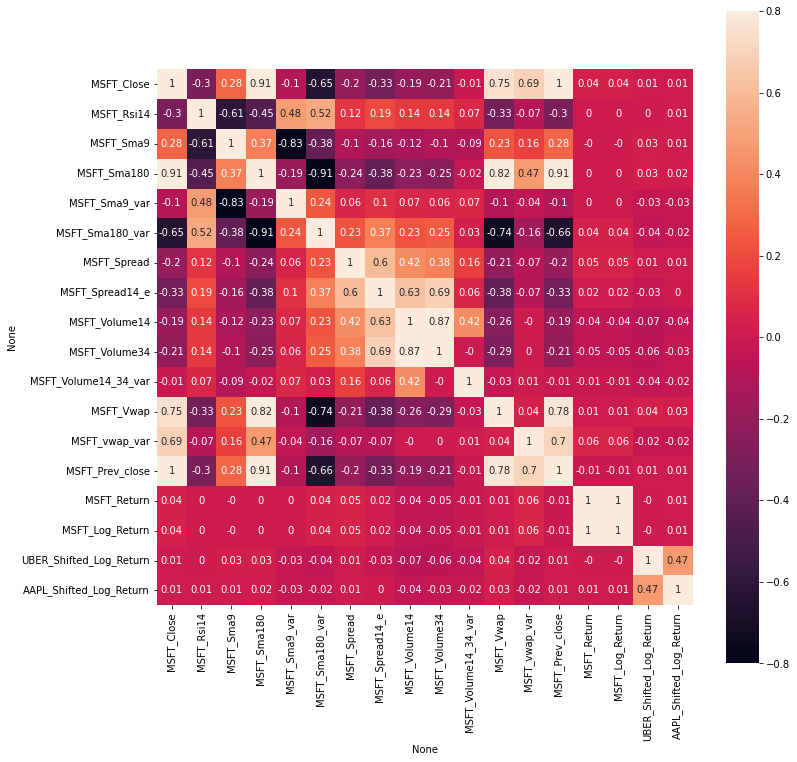

In [90]:
df_corr = df_v.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df_corr, vmin=-.8, vmax=.8, square=1, annot=True)

In [98]:
df_l['MSFT_Shifted_Log_Return'] = True

SyntaxError: cannot assign to comparison (414965262.py, line 1)

In [ ]:
fig = plt.figure(figsize = (20, 25))
for i, col in enumerate(df_v.columns):
    print(i, end=' ')
    plt.subplot(((df_v.shape[1]-1)//4)+1, 4, i+1)
    sns.boxplot(x='MSFT_Shifted_Log_Return', y=col, data=df_l)
plt.show()

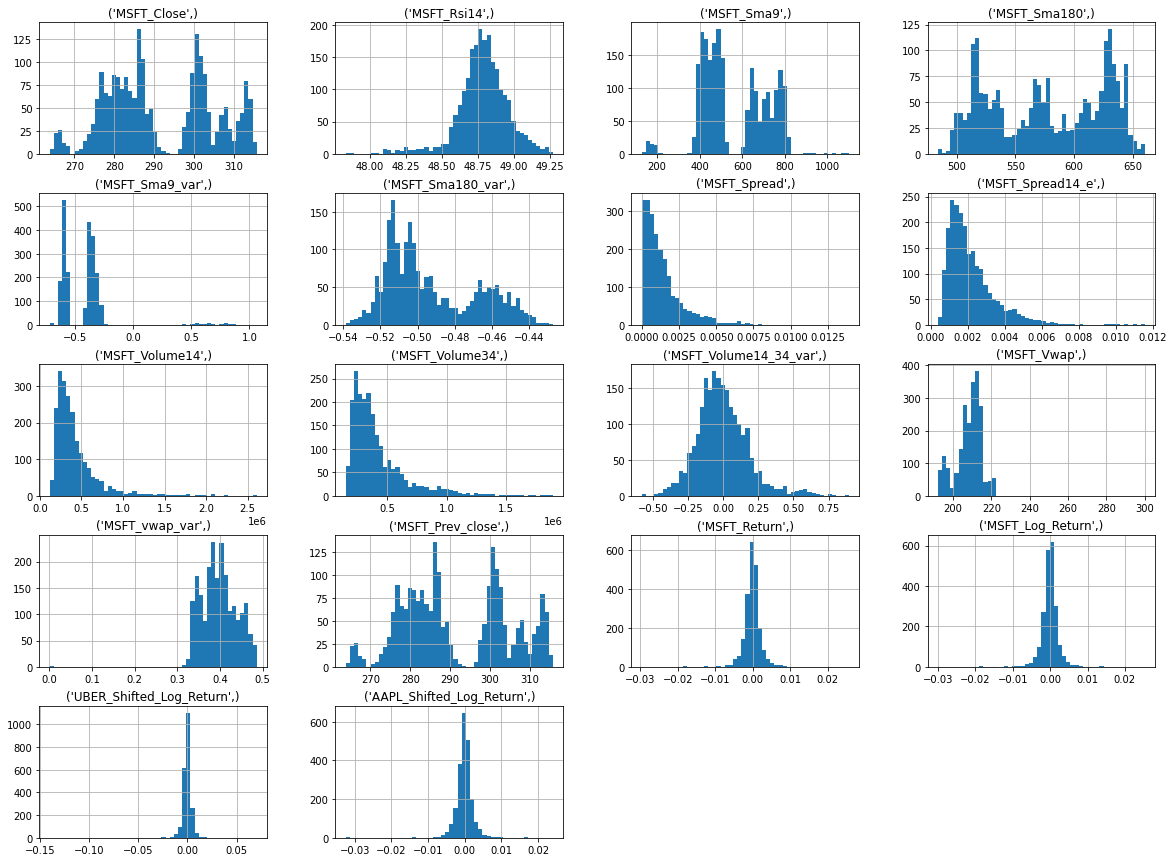

In [99]:
df_e = df_v.copy()
df_e.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
Ctrain.value_counts()

(MSFT_Shifted_Log_Return,)
False                         827
True                          772
dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators': [800], # Number of trees in random forest
    'max_depth': [2048, None],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
}

model_random_cv = RandomizedSearchCV(
    estimator = model,
    param_distributions = random_grid,
    n_iter = 10,
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    verbose=2,
    random_state=42,
    n_jobs = -1,
    scoring = 'roc_auc',
    refit=False,
)
model_random_cv.fit(train_msft, Ctrain)
# print(f'Train_Score = {model.score(train_msft, Ctrain)}, Test_Score = {model.score(test_msft,Ctest)}')

# Ptrain =model.predict(train_msft)
# Ptest =model.predict(test_msft)

In [ ]:
import pprint

In [ ]:
# Print results
for tup in sorted(zip(model_random_cv.cv_results_['params'], model_random_cv.cv_results_['mean_test_score']), key = lambda x: x[1], reverse=1):
    pprint.pprint(tup[0])
    print(round(tup[1], 5))
    print()

{'max_depth': 2048,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 800}
0.85951

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 800}
0.85905

{'max_depth': 2048,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 800}
0.85747

{'max_depth': 2048,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}
0.85699

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}
0.85699

{'max_depth': 2048,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}
0.85608

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 800}
0.85529

{'max_depth': 2048,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 800}
0.85516

{'max_depth': 2048,
 'max_features': 2,


roc_auc_score: 0.8361577931553924
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00343643 0.00343643 0.00687285
 0.01030928 0.01030928 0.0137457  0.01718213 0.02061856 0.02749141
 0.03092784 0.03780069 0.04810997 0.05841924 0.07560137 0.0790378
 0.08934708 0.08934708 0.10309278 0.10996564 0.11340206 0.11683849
 0.12027491 0.12714777 0.13058419 0.14089347 0.14776632 0.15463918
 0.17525773 0.17869416 0.18556701 0.18900344 0.20962199 0.22680412
 0.24742268 0.25429553 0.26804124 0.28865979 0.29553265 0.3024055
 0.31958763 0.33333333 0.34707904 0.36426117 0.38831615 0.39862543
 0.41237113 0.42611684 0.45360825 0.46735395 0.51546392 0.54295533
 0.56013746 0.56701031 0.60137457 0.6185567  0.62886598 0.66323024
 0.68728522 0.71134021 0.73539519 0.79037801 0.81786942 0.83505155
 0.84536082 0.87628866 0.90034364 0.91752577 0.93814433 0.95189003
 0.96219931 0.97938144 0.98281787 0.99656357 1.        ]
[0.         0.00342466 0.01369863 0.03082192 0.0

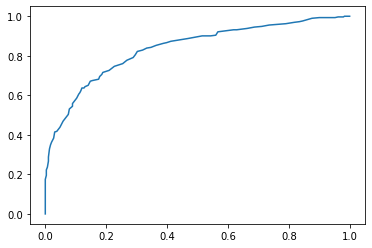

In [ ]:
y_test_pp = model.predict_proba(test_msft)
print('roc_auc_score:', roc_auc_score(Ctest, y_test_pp[:,1]))
fpr, tpr, thres = roc_curve(Ctest, y_test_pp[:,1])
print(fpr)
print(tpr)
print(thres)
ax = plt.plot(fpr, tpr)
plt.show()